<a href="https://colab.research.google.com/github/belenkf/belenkf/blob/main/DS_FABBRIZI_TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

PRESENTACIÓN DEL DATASET

In [55]:
df = pd.read_csv('/content/drive/MyDrive/informacion-publica-respiratorias-nacional.csv')
df.head(10)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),5,5 a 9,1
1,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),9,25 a 34,1
2,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
3,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),4,2 a 4,2
4,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),5,5 a 9,1
5,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),10,35 a 44,1
6,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),2,6 a 11 m,2
7,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),3,12 a 23 m,5
8,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),4,2 a 4,40
9,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),5,5 a 9,7


Éste dataset extrae resultados de epidemiología en patologías respiratorias en contexto o a nivel nacional en relación alos virus detectados en una brecha de tiempo y según la cantidad de casos y edades.

Diccionario y Objetivos:

Aqui se debe especificar el significado de cada columna del data set cargado y sus unidades.

Elegí el dataset del Ministerio de salud ya que quiero hacer algo diferente a lo que suelo manejar y desafiarme. No conozco los datos y espero poder recorrerlos y explorarlos con el objetivo de encontrarme con datos nuevos y familiarizarme con ellos, pudiendo pulirlos y tomar dimensión de que se tratan y para que nos sirven. también me planteo si serán suficientes y si pudiera agregar nuevos datos para futuras conclusiones, cuales serían??

Objetivos: ver promedio de edad en que se denotan las diferentes patologías.
Ver la diferencia o mapas de lugares de prevalencia.
Se correlacionan  las patologías respiratorias con los lugares más fríos del país o con los de mayor densidad de población?
Se podrá saber si hay zonas en relación a la vulnerabilidad/ clase social?


Exploración y visualización (EDA): conociendo el data set

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203730 entries, 0 to 203729
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          203730 non-null  int64 
 1   departamento_nombre      203730 non-null  object
 2   provincia_id             203730 non-null  int64 
 3   provincia_nombre         203730 non-null  object
 4   anio                     203730 non-null  int64 
 5   semanas_epidemiologicas  203730 non-null  int64 
 6   evento_nombre            203730 non-null  object
 7   grupo_edad_id            203730 non-null  int64 
 8   grupo_edad_desc          203730 non-null  object
 9   cantidad_casos           203730 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.5+ MB


el Dataset cuenta con 10 columnas con 203730 resultados y no hay faltantes, 4 son objetos o palabras, el resto son números

In [4]:
df.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

In [5]:
df.notnull().sum()

departamento_id            203730
departamento_nombre        203730
provincia_id               203730
provincia_nombre           203730
anio                       203730
semanas_epidemiologicas    203730
evento_nombre              203730
grupo_edad_id              203730
grupo_edad_desc            203730
cantidad_casos             203730
dtype: int64

In [6]:
df.shape

(203730, 10)

<Axes: title={'center': 'cantidad_casos'}>

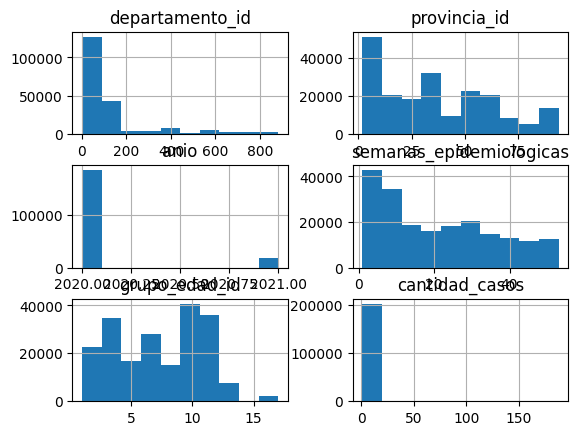

In [7]:
df.hist() # distribución de la variable
sns.boxplot() #identificación de outliers

In [8]:
df.describe()

,departamento_id,provincia_id,anio,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,203730.000000,203730.000000,203730.000000,203730.000000,203730.000000,203730.000000
mean,131.297546,36.166338,2020.094660,21.039361,7.235851,2.250056
std,181.936717,26.261561,0.292745,15.113364,3.584929,3.108761
min,1.000000,2.000000,2020.000000,1.000000,1.000000,1.000000
25%,28.000000,10.000000,2020.000000,8.000000,4.000000,1.000000
50%,63.000000,30.000000,2020.000000,18.000000,7.000000,1.000000
75%,133.000000,54.000000,2020.000000,33.000000,10.000000,2.000000
max,882.000000,94.000000,2021.000000,53.000000,17.000000,188.000000


LO QUE VEO:

La tabla me brinda datos epidemiológicos relacionados con casos de una enfermedad (hay 3 patologías que se describen) en diferentes departamentos o regiones. Cada fila parece representar información sobre el número de casos reportados en un departamento (después veremos cual) durante un año y semana epidemiológica determinada, desglosados por grupos de edad.
No puedo establecer cual es menor o mayor porque no están ordenados de menor a mayor.

Éste describe me dice las medidas de tendencia central: que los datos tienen una: media de 131.2 en departamentos y de 36 en provincias.

Algunas conclusiones que se pueden derivar de esta tabla son:
La cantidad promedio de casos reportados por semana epidemiológica en un departamento es de alrededor de 21.

La mayoría de los departamentos parecen tener una cantidad relativamente baja de casos, con un promedio de aproximadamente 2 casos por semana.

Existe una variabilidad considerable en la cantidad de casos reportados, como se indica por la desviación estándar relativamente alta.

La mayoría de los casos parecen concentrarse en grupos de edad más jóvenes, ya que el grupo de edad con mayor cantidad de casos tiene un valor medio de alrededor de 7.
Existen diferencias en la distribución de casos entre los diferentes departamentos, como se refleja en los percentiles 25, 50 y 75.

Se observa que el departamento con la mayor cantidad de casos reportados tiene un máximo de 188 casos en una semana epidemiológica específica.


no encontré como hacer el sesgo ni el coeficiente de variación

In [60]:
# prompt: como calculo la covarianza?

# Calculate the covariance matrix
covariance_matrix = numerical_df.cov()

print(covariance_matrix)


                         departamento_id  provincia_id      anio  \
departamento_id             33100.968856  -2261.306526 -0.877515   
provincia_id                -2261.306526    689.669606  0.022747   
anio                           -0.877515      0.022747  0.085700   
semanas_epidemiologicas       -47.292708      5.271180 -1.500165   
grupo_edad_id                  -5.513943      0.026091  0.017202   
cantidad_casos                  1.201551     -2.721055  0.013541   

                         semanas_epidemiologicas  grupo_edad_id  \
departamento_id                       -47.292708      -5.513943   
provincia_id                            5.271180       0.026091   
anio                                   -1.500165       0.017202   
semanas_epidemiologicas               228.413772       3.366618   
grupo_edad_id                           3.366618      12.851716   
cantidad_casos                         -0.185831       0.182923   

                         cantidad_casos  
departament

conclusión:

En éste caso, los datos epidemiológicos me dicen con la covarianza, que se podría ver si hay una relación entre la cantidad de casos de una enfermedad y alguna variable específica, como la edad de los afectados o la ubicación geográfica.

Ejemplo:
año y semana epidemiológica se mueven en dirección opuesta como los deptos y las semanas epidemiológicas o deptos y grupos de edad o provincia y cantidad de casos.

a diferencia de provincia y semana epidemiológica o grupo de edad y semanas epidemiológicas que van en la misma dirección.

Esto podría ayudar a identificar posibles factores de riesgo asociados con la propagación de la enfermedad y a tomar medidas preventivas o de intervención más efectivas cuando saquemos las consluciones definitivas.

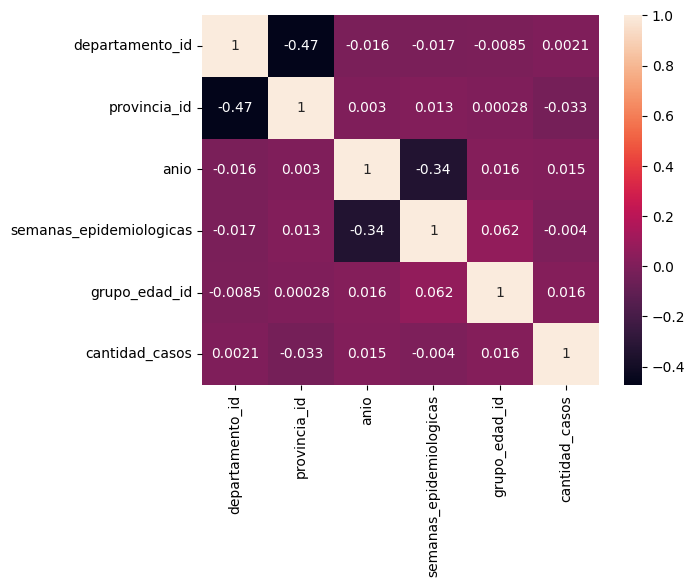

In [11]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

los datos tienen correlación lineal descendente

In [9]:
df.tail(10)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
203720,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),5,5 a 9,3
203721,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),6,10 a 14,1
203722,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),7,15 a 19,1
203723,35,CONFLUENCIA,58,Neuquén,2020,8,Enfermedad tipo influenza (ETI),9,25 a 34,1
203724,35,CONFLUENCIA,58,Neuquén,2020,8,Enfermedad tipo influenza (ETI),11,45 a 64,1
203725,21,CAPITAL,42,La Pampa,2020,11,Enfermedad tipo influenza (ETI),10,35 a 44,1
203726,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),8,20 a 24,1
203727,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),9,25 a 34,1
203728,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),12,65 a 74,2
203729,21,DIAMANTE,30,Entre Ríos,2020,11,Neumonía (sin especificar),12,65 a 74,1


NOTA: df.tail() es una herramienta útil para revisar rápidamente las últimas filas de un DataFrame en pandas y obtener información sobre cómo finalizan tus datos.

In [10]:
len(df['departamento_nombre'].unique())

396

describe que hay 396 departamentos en la lista de los mismos

para correlacionar que los strin sean correspondientes y se puedan enumerar

In [30]:
# como se cuantas semanas epidemiologicas corresponden a cada año?

# Assuming the dataset contains a column named 'semana_epidemiologica'
semanas_por_anio = df.groupby('anio')['semanas_epidemiologicas'].nunique()
print(semanas_por_anio)


anio
2020    53
2021    11
Name: semanas_epidemiologicas, dtype: int64


Entonces las semanas epidemiológicas son 64

quiero identificar los departamentos

In [12]:
departamentos = df['departamento_nombre'].unique()
print(departamentos)

['GENERAL SAN MART?N' 'LA PAZ' 'CAPITAL' 'BERMEJO' 'UNI?N'
 'JUAN BAUTISTA ALBERDI' 'CURUZ? CUATI?' 'SARMIENTO' 'USHUAIA'
 'GOBERNADOR DUPUY' 'GUALEGUAY' 'DR. MANUEL BELGRANO'
 'LIBERTADOR GENERAL SAN MART?N' 'R?O GRANDE' 'A?ELO' 'AVELLANEDA'
 'Z?RATE' 'BELGRANO' 'RAM?N LISTA' 'GENERAL VILLEGAS' 'ALBERDI'
 'SAN MIGUEL' 'SAN MART?N' 'ALMIRANTE BROWN' 'SAN FERNANDO' 'COMUNA 5'
 'LA PLATA' 'LIBERTADOR GRL. SAN MART?N' 'SAN ANDR?S DE GILES'
 'LEANDRO N. ALEM' 'CHACABUCO' 'SALADAS' 'RIVADAVIA' 'GENERAL ALVEAR'
 'MONTEROS' 'CHILECITO' 'SAN PEDRO' 'TAF? DEL VALLE' 'GENERAL ROCA'
 'LAGO ARGENTINO' 'AZUL' 'SANTA MAR?A' '25 DE MAYO' 'DESEADO'
 'CASTELLANOS' 'SAN RAFAEL' 'PICHI MAHUIDA' 'SAN CARLOS' 'JUN?N' 'PEHUAJ?'
 'ESCOBAR' 'CARLOS CASARES' 'LAS HERAS' 'R?O SEGUNDO' 'L?CAR' 'LAISHI'
 'SAN IGNACIO' 'LA CAPITAL' 'FEDERACI?N' 'ROSARIO' 'GENERAL LAS HERAS'
 'ISLAS DEL IBICUY' 'OR?N' 'PARAN?' 'GENERAL GUIDO' 'PELLEGRINI' 'PILAG?S'
 'JU?REZ CELMAN' 'PRESIDENTE PER?N' 'IGUAZ?' 'INDEPENDENCIA' 'SAN R

quiero identificar las provincias

In [13]:
provincias = df['provincia_nombre'].unique()
print(provincias)


['Córdoba' 'Entre Ríos' 'Misiones' 'Chaco' 'Tucumán' 'Corrientes'
 'San Juan' 'Tierra del Fuego' 'San Luis' 'Jujuy' 'Neuquén' 'Río Negro'
 'Buenos Aires' 'Formosa' 'Santiago del Estero' 'Salta' 'CABA' 'Mendoza'
 'La Rioja' 'Santa Cruz' 'Santa Fe' 'Catamarca' 'Chubut' 'La Pampa']


es un sondeo en todo el país, quisiera saber si hay código por provincia según el departamento y hacer un listado

In [14]:

# This dictionary can be created manually or extracted from another data source.
province_to_department = {
    "Buenos Aires": "Buenos Aires",
    "Catamarca": "Catamarca",
    "Chaco": "Chaco",
    "Chubut": "Chubut",
    "Córdoba": "Córdoba",
    "Corrientes": "Corrientes",
    "Entre Ríos": "Entre Ríos",
    "Formosa": "Formosa",
    "Jujuy": "Jujuy",
    "La Pampa": "La Pampa",
    "La Rioja": "La Rioja",
    "Mendoza": "Mendoza",
    "Misiones": "Misiones",
    "Neuquén": "Neuquén",
    "Río Negro": "Río Negro",
    "Salta": "Salta",
    "San Juan": "San Juan",
    "San Luis": "San Luis",
    "Santa Cruz": "Santa Cruz",
    "Santa Fe": "Santa Fe",
    "Santiago del Estero": "Santiago del Estero",
    "Tierra del Fuego": "Tierra del Fuego",
    "Tucumán": "Tucumán"

}

# Now, we can create a new column in the DataFrame that contains the department name for each province.
df["department_name"] = df["provincia_nombre"].map(province_to_department)

# Finally, we can group the DataFrame by department and count the number of cases in each department.
department_cases = df.groupby("department_name").size()

# Print the list of departments and their corresponding number of cases.
for department, cases in department_cases.items():
    print(f"{department}: {cases}")


Buenos Aires: 42399
Catamarca: 7230
Chaco: 16745
Chubut: 1981
Corrientes: 10983
Córdoba: 9917
Entre Ríos: 14075
Formosa: 6514
Jujuy: 11399
La Pampa: 1474
La Rioja: 8258
Mendoza: 6864
Misiones: 15863
Neuquén: 2837
Río Negro: 9540
Salta: 8070
San Juan: 5457
San Luis: 3181
Santa Cruz: 2414
Santa Fe: 3184
Santiago del Estero: 3676
Tierra del Fuego: 580
Tucumán: 9350


quiero hacer un describe de los datos por provincia

In [15]:
department_cases.describe()

count       23.000000
mean      8782.217391
std       8634.558277
min        580.000000
25%       3182.500000
50%       7230.000000
75%      10450.000000
max      42399.000000
dtype: float64

la media de casos por provincia es de 8782,la mediana de 580 QUE VAN DESDE 3182 AL25% AL 10450 AL 75% Y LOS VOY A VER REPRESENTADOS EN UNA CAJA DE BIGOTES

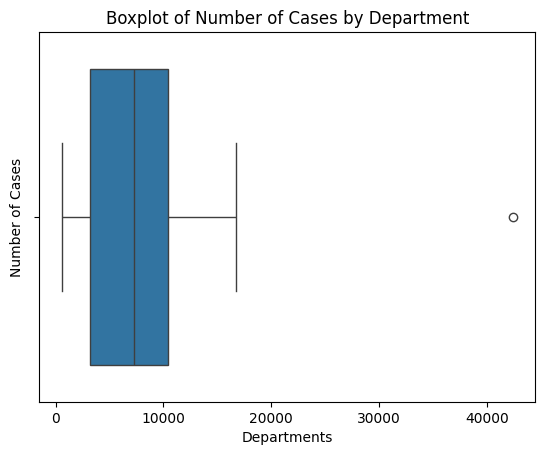

In [16]:
# prompt: hacer una caja de bigotes con ese ultimo describe

import matplotlib.pyplot as plt
sns.boxplot(x=department_cases)
plt.xlabel("Departments")
plt.ylabel("Number of Cases")
plt.title("Boxplot of Number of Cases by Department")
plt.show()


In [18]:
# prompt: quiero optimizar ese gráfico para que se vean los casos en relación a las provincias y los anios

# Agrupa los datos por provincia y año, y cuenta los casos
provincias_anios_casos = df.groupby(['provincia_nombre', 'anio'])['grupo_edad_desc'].count().reset_index(name='casos')

# Crea el gráfico de barras con Plotly Express
fig = px.bar(provincias_anios_casos,
             x='provincia_nombre',
             y='casos',
             color='anio',
             title='Casos por Provincia y Año',
             labels={'provincia_nombre': 'Provincia', 'casos': 'Número de Casos', 'anio': 'Año'})

# Ajusta el diseño para mejor visualización
fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  legend_title_font=dict(size=12))

fig.show()


provincia_nombre
Buenos Aires           42399
Chaco                  16745
Misiones               15863
Entre Ríos             14075
Jujuy                  11399
Corrientes             10983
Córdoba                 9917
Río Negro               9540
Tucumán                 9350
La Rioja                8258
Salta                   8070
Catamarca               7230
Mendoza                 6864
Formosa                 6514
San Juan                5457
Santiago del Estero     3676
Santa Fe                3184
San Luis                3181
Neuquén                 2837
Santa Cruz              2414
Chubut                  1981
CABA                    1739
La Pampa                1474
Tierra del Fuego         580
Name: grupo_edad_desc, dtype: int64


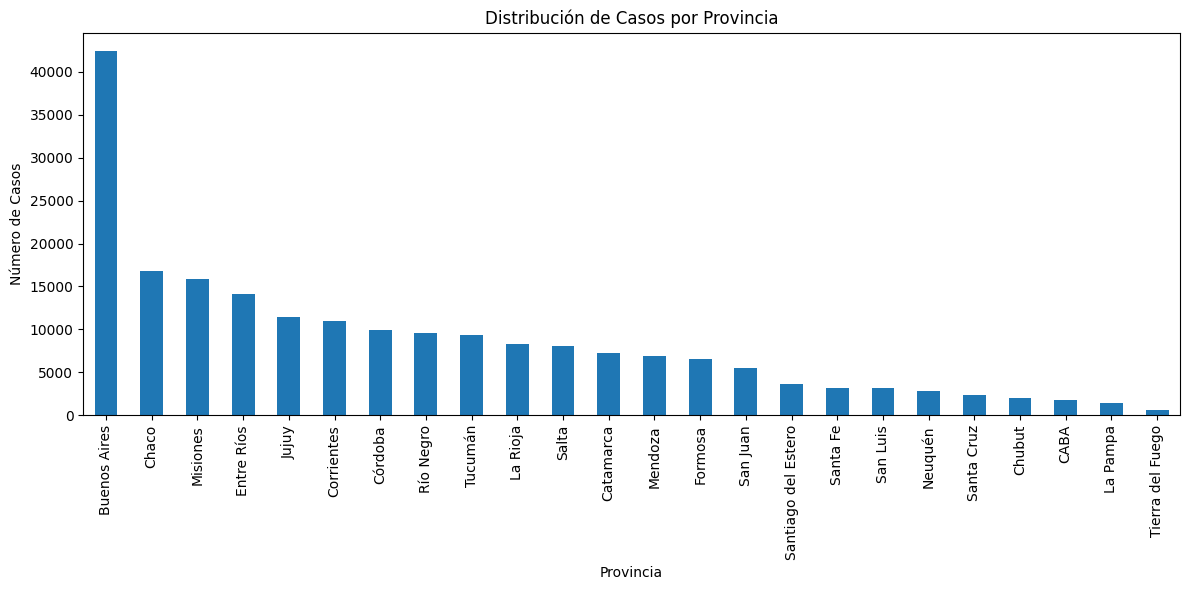

In [33]:
# prompt: Analizar la distribución de casos por provincia, departamento o región

import matplotlib.pyplot as plt
# Agrupa los datos por provincia y cuenta los casos
casos_por_provincia = df.groupby('provincia_nombre')['grupo_edad_desc'].count()

# Ordena las provincias por número de casos de mayor a menor
casos_por_provincia_ordenados = casos_por_provincia.sort_values(ascending=False)

# Imprime los resultados
print(casos_por_provincia_ordenados)

# Crea un gráfico de barras para visualizar la distribución de casos por provincia
plt.figure(figsize=(12, 6))
casos_por_provincia_ordenados.plot(kind='bar')
plt.title('Distribución de Casos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Si quieres analizar por departamento, simplemente reemplaza 'provincia_nombre' por 'departamento_nombre' en el código anterior.

# Para analizar por región, primero necesitas definir las regiones y asignar cada provincia/departamento a una región.
# Luego, puedes agrupar los datos por región y contar los casos de manera similar al ejemplo anterior.


In [19]:
# prompt: quiero optimizar ese gráfico identificando las 5 provincias mas afectadas

# Agrupa los datos por provincia y suma los casos
provincias_casos = df.groupby('provincia_nombre')['grupo_edad_desc'].count().reset_index(name='casos')

# Ordena las provincias por número de casos de mayor a menor
provincias_casos_ordenadas = provincias_casos.sort_values('casos', ascending=False)

# Selecciona las 5 provincias más afectadas
top_5_provincias = provincias_casos_ordenadas.head(5)

# Filtra el DataFrame original para incluir solo las 5 provincias más afectadas
df_top_5 = df[df['provincia_nombre'].isin(top_5_provincias['provincia_nombre'])]

# Agrupa los datos por provincia y año, y cuenta los casos para las 5 provincias más afectadas
provincias_anios_casos_top5 = df_top_5.groupby(['provincia_nombre', 'anio'])['grupo_edad_desc'].count().reset_index(name='casos')

# Crea el gráfico de barras con Plotly Express para las 5 provincias más afectadas
fig = px.bar(provincias_anios_casos_top5,
             x='provincia_nombre',
             y='casos',
             color='anio',
             title='Casos por Provincia y Año (Top 5 Provincias)',
             labels={'provincia_nombre': 'Provincia', 'casos': 'Número de Casos', 'anio': 'Año'})

# Ajusta el diseño para mejor visualización
fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  legend_title_font=dict(size=12))

fig.show()


In [46]:
# gráfico para identificar los 5 deptos mas afectadas

# Agrupa los datos por deptos y suma los casos
deptos_casos = df.groupby('departamento_nombre')['grupo_edad_id'].count().reset_index(name='casos')

# Ordena los deptos por número de casos de mayor a menor
deptos_casos_ordenados = deptos_casos.sort_values('casos', ascending=False)

# Selecciona los 5 deptos más afectadas
top_5_deptos = deptos_casos_ordenados.head(5)

# Filtra el DataFrame original para incluir solo las 5 provincias más afectadas
df_top_5 = df[df['departamento_nombre'].isin(top_5_deptos['departamento_nombre'])]

# Agrupa los datos por depto y año, y cuenta los casos para los 5 casos más afectadas
deptos_anios_casos_top5 = df_top_5.groupby(['departamento_nombre', 'anio'])['grupo_edad_id'].count().reset_index(name='casos')

# Crea el gráfico de barras con Plotly Express para los 5 deptos más afectadas
fig = px.bar(deptos_anios_casos_top5,
             x='departamento_nombre',
             y='casos',
             color='anio',
             title='Casos por departamentos y Año (Top 5 deptos)',
             labels={'departamento_nombre': 'Departamento', 'casos': 'Número de Casos', 'anio': 'Año'})

# Ajusta el diseño para mejor visualización
fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  legend_title_font=dict(size=12))

fig.show()

quiero conocer los eventos

In [ ]:
# prompt: agrupar los eventos por nombre y según la cantidad de casos

grouped_events = df.groupby('evento_nombre')['evento_nombre'].count().sort_values(ascending=False)

print(grouped_events)


evento_nombre
Enfermedad tipo influenza (ETI)                         159504
Neumonía (sin especificar)                               28214
Bronquiolitis en menores de 2 años (sin especificar)     16012
Name: evento_nombre, dtype: int64


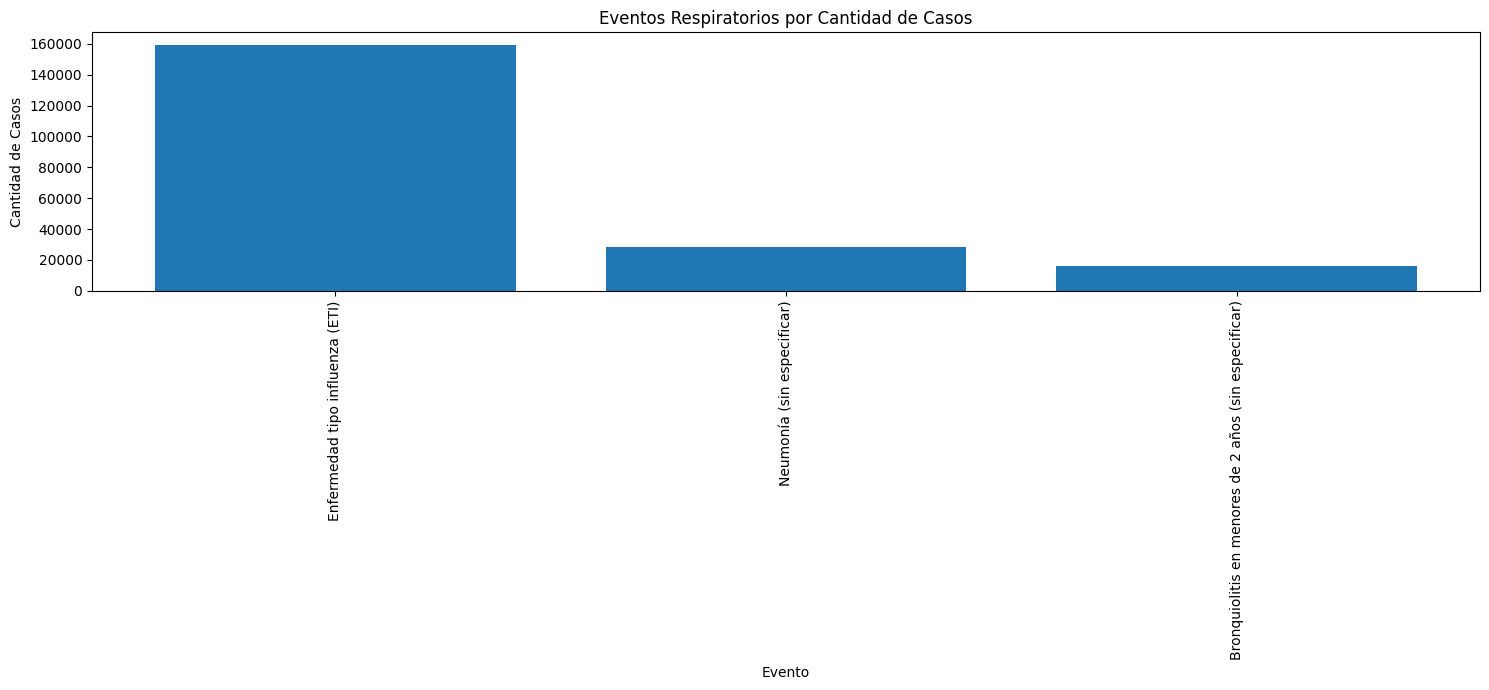

In [ ]:
# prompt: realizar un gráfico con dichos datos

import matplotlib.pyplot as plt

# Prepare data
x = grouped_events.index.to_list()
y = grouped_events.values.tolist()

# Create bar chart
plt.figure(figsize=(15, 7))
plt.bar(x, y)

# Customize chart
plt.title('Eventos Respiratorios por Cantidad de Casos')
plt.xlabel('Evento')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=90)

# Display chart
plt.tight_layout()
plt.show()


<ipython-input-36-d87bcbe02369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_35, x='departamento_id', y='grupo_edad_desc', inner='stick', palette='Dark2')


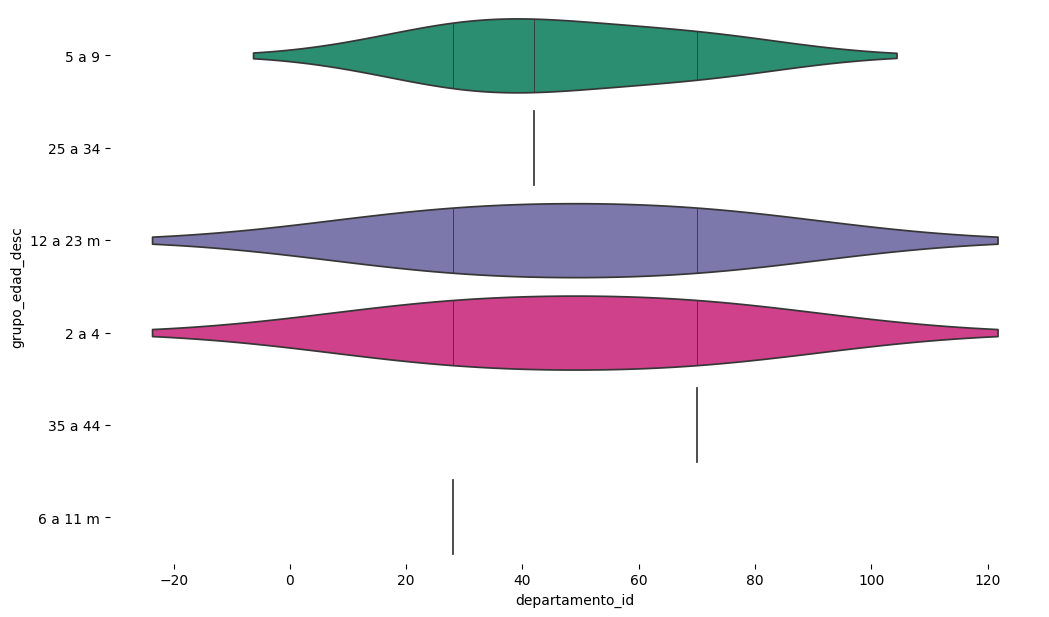

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['grupo_edad_desc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='departamento_id', y='grupo_edad_desc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
# prompt: como sé cuales son los deptos que por su id se grafican entre el 30 y 70? como los identifico?

# Filtra el DataFrame para incluir solo los departamentos con IDs entre 30 y 70
departamentos_filtrados = df[(df['departamento_id'] >= 30) & (df['departamento_id'] <= 70)]

# Obtén los nombres de los departamentos filtrados
nombres_departamentos = departamentos_filtrados['departamento_nombre'].unique()

# Imprime los nombres de los departamentos
print(nombres_departamentos)


['GENERAL SAN MART?N' 'LA PAZ' 'JUAN BAUTISTA ALBERDI' 'CURUZ? CUATI?'
 'GOBERNADOR DUPUY' 'GUALEGUAY' 'LIBERTADOR GENERAL SAN MART?N'
 'RAM?N LISTA' 'LEANDRO N. ALEM' 'MONTEROS' 'CHILECITO' 'SAN PEDRO'
 'GENERAL ROCA' 'AZUL' 'PICHI MAHUIDA' 'JUN?N' 'LAS HERAS' 'L?CAR'
 'CAPITAL' 'LA CAPITAL' 'ISLAS DEL IBICUY' 'PILAG?S' 'JU?REZ CELMAN'
 'IGUAZ?' 'INDEPENDENCIA' 'J?CHAL' 'PIRAN?' 'GENERAL L?PEZ' 'POCITO'
 'CAUCETE' 'PALPAL?' 'ELDORADO' 'PATI?O' 'LULES' 'MARCOS JU?REZ' 'LEDESMA'
 'CERRILLOS' 'GENERAL PEDERNERA' 'GENERAL DONOVAN' 'GENERAL PAZ'
 'CONCEPCI?N' 'HUILICHES' 'GARAY' 'CONFLUENCIA' 'GUATRACH?' 'BELGRANO'
 '2 DE ABRIL' 'AVELLANEDA' 'CHICOANA' 'FELICIANO' 'SANTA B?RBARA'
 'GRL. JOS? DE SAN MART?N' 'CAPAY?N' 'FAMATINA' 'GUALEGUAYCH?'
 'FRAY JUSTO SANTA MAR?A DE ORO' 'GENERAL G?EMES' 'COPO' 'PILCANIYEU'
 'GENERAL OBLIGADO' 'FUTALEUF?' 'MAIP?' 'LAVALLE' 'CONHELO' 'LAS COLONIAS'
 'BANDA' 'PILCOMAYO' 'GAIMAN' '?ORQUINC?' 'LUJ?N DE CUYO' 'LA COCHA'
 'CHIMBAS' 'BAH?A BLANCA' 'LOS LAGOS' 

evento_nombre                        Bronquiolitis en menores de 2 años (sin especificar)  \
departamento_nombre grupo_edad_desc                                                         
12 DE OCTUBRE       10 a 14                                                          0      
                    12 a 23 m                                                       43      
                    15 a 19                                                          0      
                    2 a 4                                                            0      
                    20 a 24                                                          0      
...                                                                                ...      
ZAPALA              65 a 74                                                          0      
                    < 6 m                                                            5      
                    >= a 75                                           

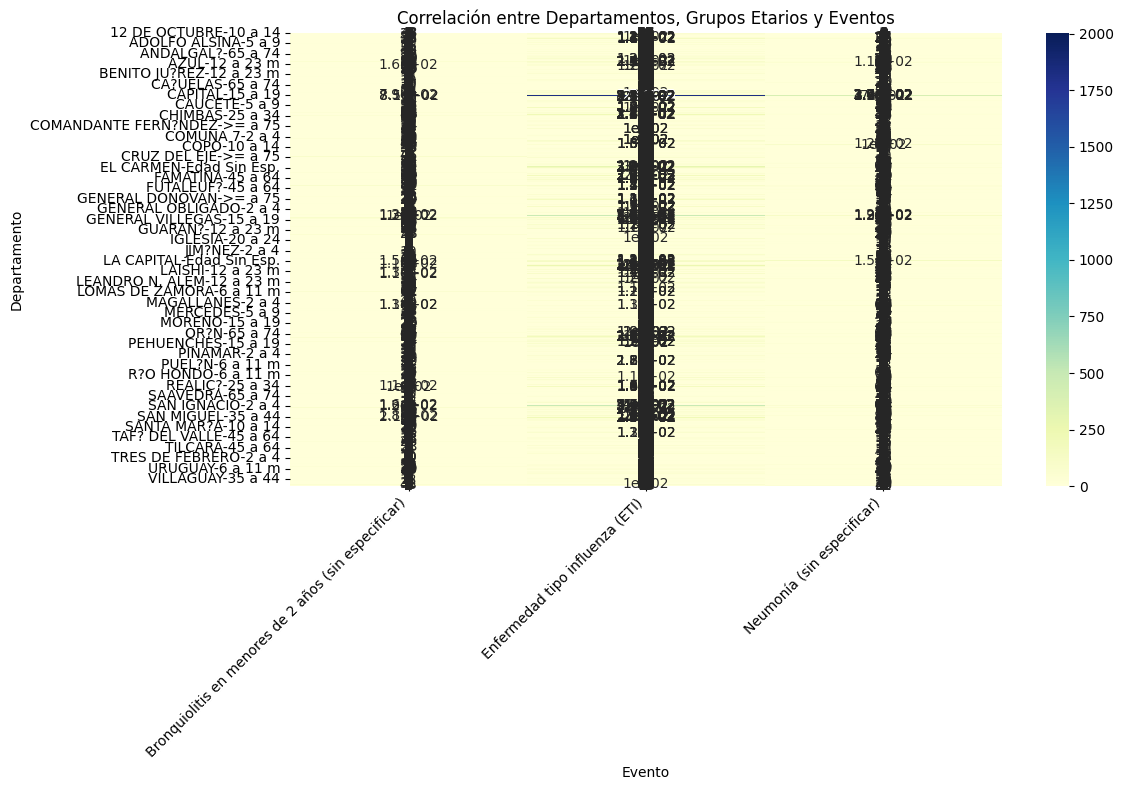

In [66]:
# prompt: como correlaciono esos departamentos con los grupos etarios y los eventos?

import pandas as pd
import matplotlib.pyplot as plt
# Para correlacionar los departamentos con los grupos etarios y los eventos,
# puedes usar una tabla de contingencia o un heatmap.

# 1. Tabla de Contingencia:

# Crea una tabla de contingencia para ver la frecuencia de cada combinación
# de departamento, grupo etario y evento.
contingency_table = pd.crosstab([df['departamento_nombre'], df['grupo_edad_desc']], df['evento_nombre'])

# Imprime la tabla
print(contingency_table)

# 2. Heatmap:

# Crea un heatmap para visualizar la tabla de contingencia.
# Esto te ayudará a identificar patrones y relaciones entre las variables.
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Correlación entre Departamentos, Grupos Etarios y Eventos')
plt.xlabel('Evento')
plt.ylabel('Departamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Si quieres enfocarte en los departamentos filtrados (IDs 30-70),
# simplemente filtra el DataFrame antes de crear la tabla de contingencia o el heatmap.

# Filtra el DataFrame para incluir solo los departamentos con IDs entre 30 y 70
departamentos_filtrados = df[(df['departamento_id'] >= 30) & (df['departamento_id'] <= 70)]

# Crea la tabla de contingencia o el heatmap usando el DataFrame filtrado
contingency_table_filtrada = pd.crosstab([departamentos_filtrados['departamento_nombre'], departamentos_filtrados['grupo_edad_desc']], departamentos_filtrados['evento_nombre'])

# ... (resto del código para crear el heatmap)


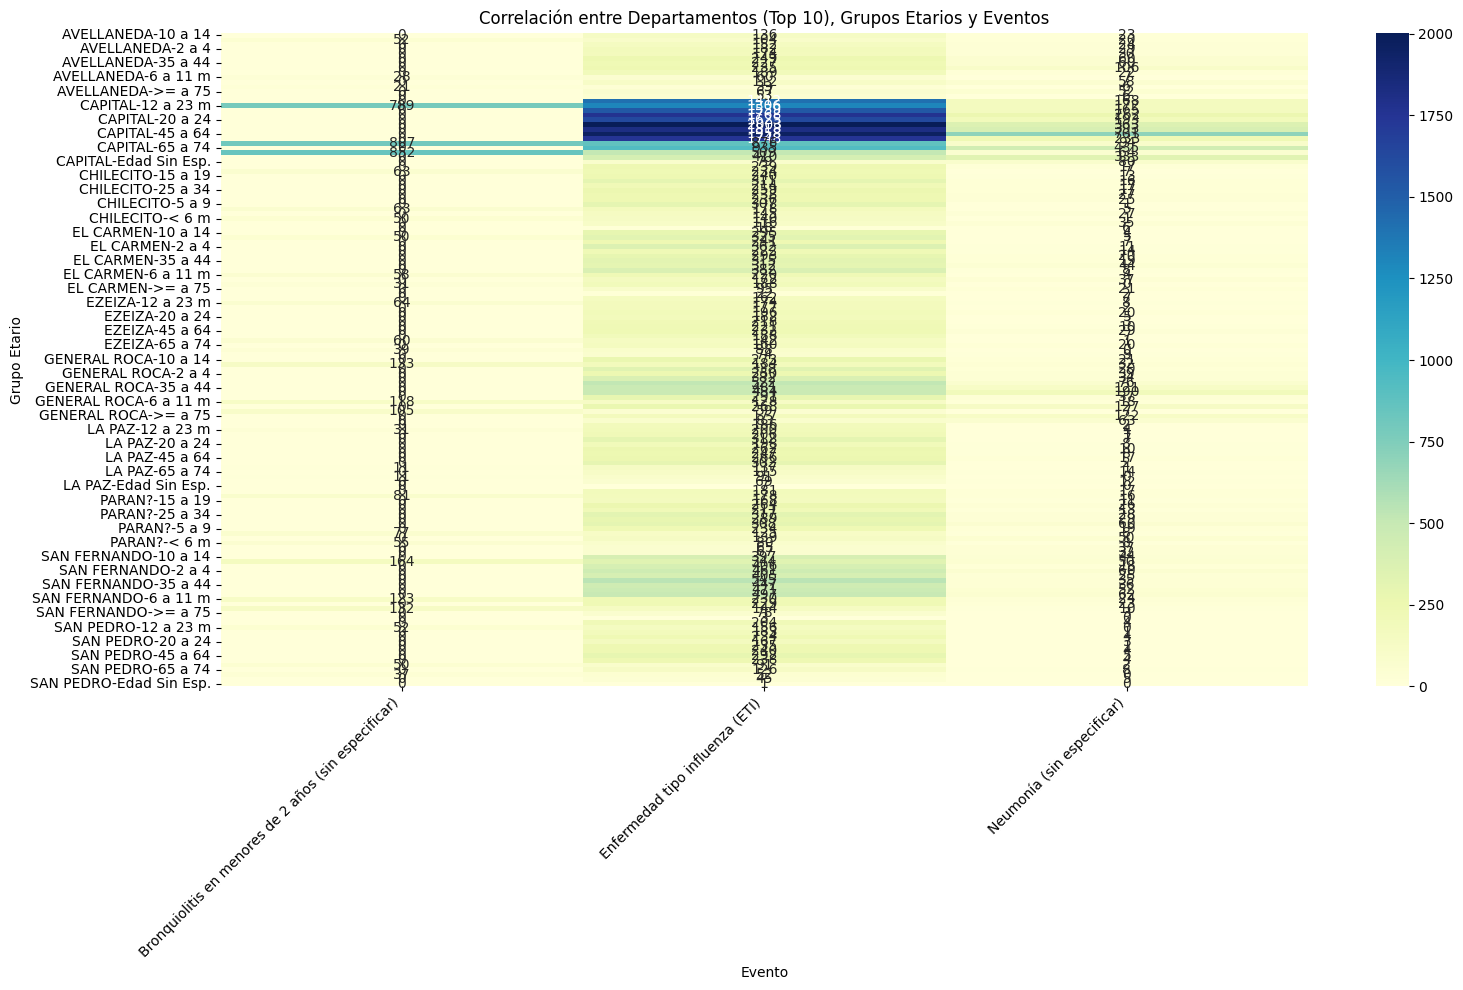

In [68]:
# prompt: como se puede mejorar la visualizacion de ese gráfico? se pueden elegir los 20 departamentos con mayores casos?

import pandas as pd
import matplotlib.pyplot as plt
# Agrupa los datos por departamento y suma los casos
deptos_casos = df.groupby('departamento_nombre')['grupo_edad_id'].count().reset_index(name='casos')

# Ordena los departamentos por número de casos de mayor a menor
deptos_casos_ordenados = deptos_casos.sort_values('casos', ascending=False)

# Selecciona los 20 departamentos con más casos
top_10_deptos = deptos_casos_ordenados.head(10)

# Filtra el DataFrame original para incluir solo los 20 departamentos con más casos
df_top_10 = df[df['departamento_nombre'].isin(top_10_deptos['departamento_nombre'])]

# Crea la tabla de contingencia usando el DataFrame filtrado
contingency_table_filtrada = pd.crosstab([df_top_10['departamento_nombre'], df_top_10['grupo_edad_desc']], df_top_10['evento_nombre'])

# Crea un heatmap para visualizar la tabla de contingencia filtrada
plt.figure(figsize=(16, 10))  # Ajusta el tamaño de la figura para mejor visualización
sns.heatmap(contingency_table_filtrada, annot=True, cmap="YlGnBu", fmt="d")  # fmt="d" para mostrar números enteros
plt.title('Correlación entre Departamentos (Top 10), Grupos Etarios y Eventos')
plt.xlabel('Evento')
plt.ylabel('Grupo Etario')
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)  # Ajusta el tamaño de la fuente de las etiquetas del eje y
plt.tight_layout()
plt.show()


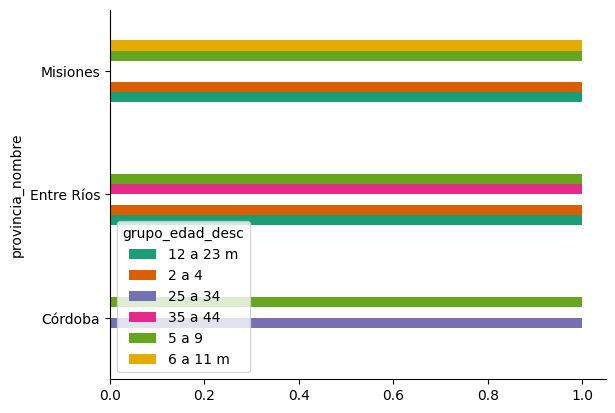

In [ ]:
# prompt: COMO CORRIJO ESE G´RAFICO PARA QUE QUEDE ORDENADO POR EDAD Y POR PROVINCIA?

import matplotlib.pyplot as plt
_df_18.groupby(['provincia_nombre', 'grupo_edad_desc']).size().unstack().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


In [37]:
# prompt: como puedo hacer para renombrar los grupos de edad de menos a mayor si de 6 a 11 m es el más pequeño, le sigue de 12 a 23 m, luego de 25 a 34 m, de 35 a 44 m, luego de 2 a 4 años y por ultimo de 5 a 9 años?

# Crea un diccionario para mapear los nombres de los grupos de edad actuales a los nuevos nombres ordenados
orden_edades = {
    'de 6 a 11 m': '1. de 6 a 11 m',
    'de 12 a 23 m': '2. de 12 a 23 m',
    'de 2 a 4 años': '3. de 2 a 4 años',
    'de 25 a 34 m': '4. de 25 a 34 m',
    'de 35 a 44 m': '5. de 35 a 44 m',
    'de 5 a 9 años': '6. de 5 a 9 años'
}

# Aplica el mapeo a la columna 'grupo_edad_desc' para renombrar los grupos de edad
df['grupo_edad_desc'] = df['grupo_edad_desc'].map(orden_edades)

# Ahora puedes usar la columna 'grupo_edad_desc' con los nombres ordenados en tus análisis y visualizaciones.

# Ejemplo:
# Agrupa los datos por grupo de edad y cuenta los casos
casos_por_edad = df.groupby('grupo_edad_desc')['grupo_edad_desc'].count()

# Imprime los resultados
print(casos_por_edad)


Series([], Name: grupo_edad_desc, dtype: int64)


haré una correlación para saber si los datos tienen sentido

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



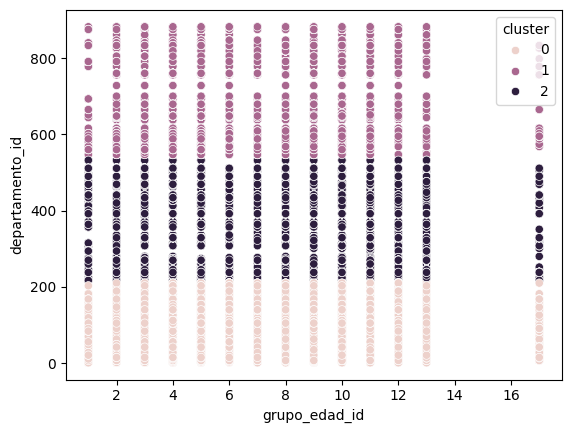

In [41]:
#AGRUPAMIENTO:
#Selecciona las variables relevantes para el agrupamiento
features = df[['grupo_edad_id', 'provincia_id', 'departamento_id']]

# Aplica un algoritmo de agrupamiento, como K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Agrega las etiquetas de los grupos al DataFrame
df['cluster'] = kmeans.labels_

# Visualiza los grupos
sns.scatterplot(x='grupo_edad_id', y='departamento_id', hue='cluster', data=df)
plt.show()

voy a graficar la cantidad de casos de cada eventos respiratorios a lo largo de los años para comprender que evento tiene más reelevancia según la edad:

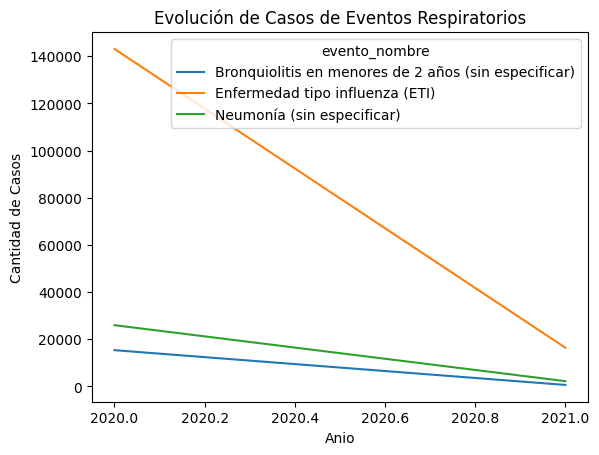

In [ ]:
# Agrupa los datos por año y evento, y cuenta los casos
grouped_events_by_year = df.groupby(['anio', 'evento_nombre'])['evento_nombre'].count().unstack()

# Grafica la evolución de los casos
grouped_events_by_year.plot(kind='line')
plt.title('Evolución de Casos de Eventos Respiratorios')
plt.xlabel('Anio')
plt.ylabel('Cantidad de Casos')
plt.show()

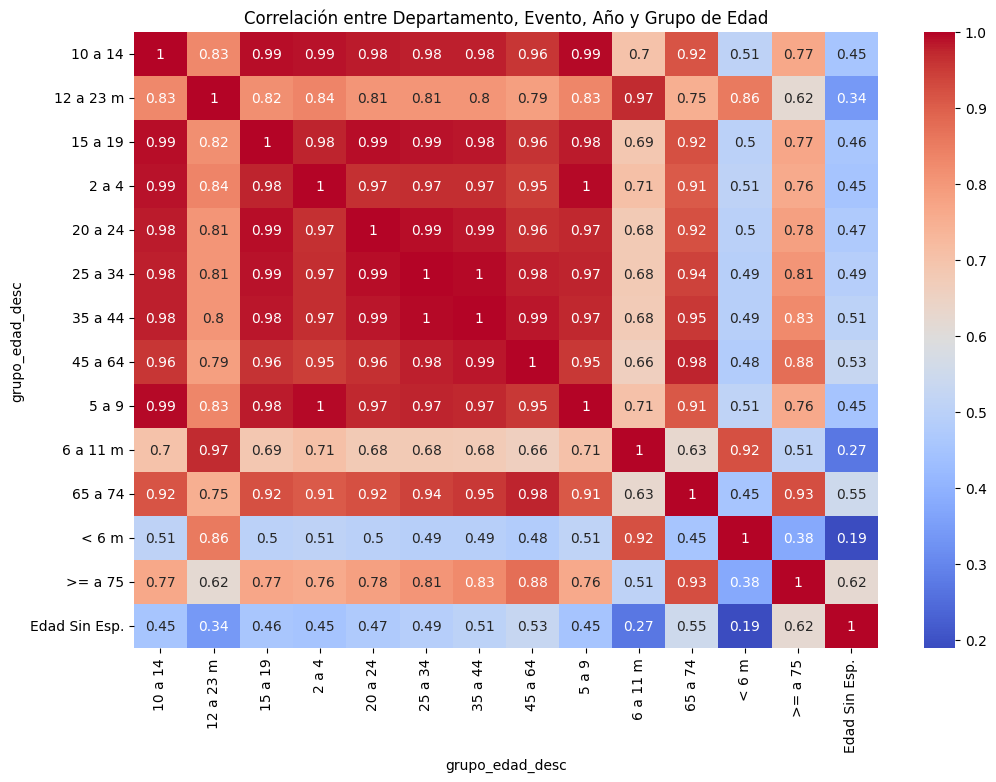

In [34]:
# prompt: correlacionar departamento con eventos y anio por edades

import matplotlib.pyplot as plt
# Agrupa los datos por departamento, evento, año y grupo de edad, y cuenta los casos
grouped_data = df.groupby(['departamento_nombre', 'evento_nombre', 'anio', 'grupo_edad_desc'])['grupo_edad_desc'].count().unstack().fillna(0)

# Calcula la correlación entre las variables
correlation_matrix = grouped_data.corr()

# Visualiza la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Departamento, Evento, Año y Grupo de Edad')
plt.show()


**CONCLUSIÓN**

Para ampliar el análisis y obtener información más detallada, se podría:

1. Explorar más variables:

Variables geográficas: Analizar la distribución de casos por provincia, departamento o región. Utilizar mapas para visualizar la concentración geográfica de las enfermedades respiratorias.
Variables demográficas: Estudiar la relación entre las enfermedades respiratorias y variables como sexo, edad, nivel socioeconómico, acceso a servicios de salud, etc.
Variables ambientales: Investigar la posible influencia de factores ambientales como la contaminación del aire, la temperatura, la humedad, etc.
Variables temporales: Analizar la evolución de los casos a lo largo del tiempo, identificando patrones estacionales o tendencias a largo plazo.
2. Aplicar diferentes técnicas estadísticas:

Modelos de regresión: Para estudiar la relación entre las enfermedades respiratorias y diferentes variables predictoras.
Análisis de series temporales: Para analizar la evolución de los casos a lo largo del tiempo y realizar predicciones.
Análisis de supervivencia: Para estudiar el tiempo hasta la ocurrencia de un evento, como la hospitalización o el fallecimiento, en relación con diferentes variables.
3. Realizar pruebas adicionales:

Pruebas de hipótesis: Para comparar grupos y determinar si existen diferencias significativas en la incidencia de enfermedades respiratorias.
Pruebas de asociación: Para identificar relaciones entre diferentes variables categóricas.
4. Considerar la incorporación de datos externos:

Datos climáticos: Para analizar la influencia de factores climáticos en las enfermedades respiratorias.
Datos socioeconómicos: Para estudiar la relación entre la incidencia de enfermedades respiratorias y la vulnerabilidad social.

Para estudiar la relación entre la edad y la incidencia de diferentes eventos respiratorios, podrías realizar un análisis de regresión logística:

In [ ]:
import statsmodels.api as sm

# Crea una variable dummy para cada evento respiratorio
for evento in df['evento_nombre'].unique():
    df[evento] = (df['evento_nombre'] == evento).astype(int)

# Ajusta un modelo de regresión logística para cada evento
for evento in df['evento_nombre'].unique():
    X = df[['grupo_edad_id']]
    y = df[evento]
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
    print(f"Modelo para {evento}:")
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.517981
         Iterations 5
Modelo para Enfermedad tipo influenza (ETI):
                                  Logit Regression Results                                 
Dep. Variable:     Enfermedad tipo influenza (ETI)   No. Observations:               203730
Model:                                       Logit   Df Residuals:                   203728
Method:                                        MLE   Df Model:                            1
Date:                             Tue, 16 Jul 2024   Pseudo R-squ.:                0.009954
Time:                                     23:45:36   Log-Likelihood:            -1.0553e+05
converged:                                    True   LL-Null:                   -1.0659e+05
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------